# **Qiskit Basics & Single Qubit Quantum Gates**

#### Importuing the necessary gates

In [2]:
import qiskit
import numpy
from qiskit_aer import Aer
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit.visualization import plot_bloch_multivector, plot_histogram # # Plotting the Bloch Sphere for Single Qubits & 2D histogram
from math import pi, sqrt

In [2]:
#  Printing the Qiskit Version
qiskit.__version__

'1.2.0'

#### Aer simulates the behavior of quantum systems, by calculating the state vector, the unitary matrices, the probablistic outcomes of a measurement and some more. The following code lists all simulatiors. 

In [12]:
# accessing Aer backends lists
Aer.backends()

[AerSimulator('aer_simulator'),
 AerSimulator('aer_simulator_statevector'),
 AerSimulator('aer_simulator_density_matrix'),
 AerSimulator('aer_simulator_stabilizer'),
 AerSimulator('aer_simulator_matrix_product_state'),
 AerSimulator('aer_simulator_extended_stabilizer'),
 AerSimulator('aer_simulator_unitary'),
 AerSimulator('aer_simulator_superop'),
 QasmSimulator('qasm_simulator'),
 StatevectorSimulator('statevector_simulator'),
 UnitarySimulator('unitary_simulator')]

## Initialising Quantum Circuit

#### QuantumCircuit class creates quantum circuits where provides the framework to design, build, and execute quantum algorithms.

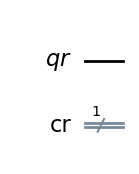

In [16]:
cr = ClassicalRegister(1, 'cr') # adding 1 bit
qr = QuantumRegister(1, 'qr') # adding 1 qubit
qc = QuantumCircuit(qr,cr)
qc.draw('mpl')

## Basic Qiskit Information

- All qubits in qiskit starts from the vaccume state $\ket 0$ by default.
- Qiskit uses little endian ordering system for both classical bit and quantum bit ordering. This means that for 3 qubits $q_0$, $q_1$ & $q_2$, the qiskit ordering is reversed as $q_2$, $q_1$ & $q_0$. Same is for classical bits as well.

## **Single Qubit Quantum Gates**
#### Here we introduce several quantum gates for single qubits 
## 1. $X$ Pauli Gate
#### $X$ Pauli gate - $X$ gate in short - flips the qubit.

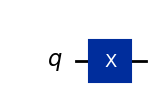

In [3]:
qc_x = QuantumCircuit(1)
qc_x.x(0)
#qc_x.save_statevector()
qc_x.draw('mpl')

#### To see the effect of $X$ gate on the inital state of a qubit, $\ket0$, we use **Aer** module of the qiskit. 

#### To visualize the statevector, we use graphical **plot_bloch_multivector** module.


Quantum state is: Statevector([0.+0.j, 1.+0.j],
            dims=(2,))


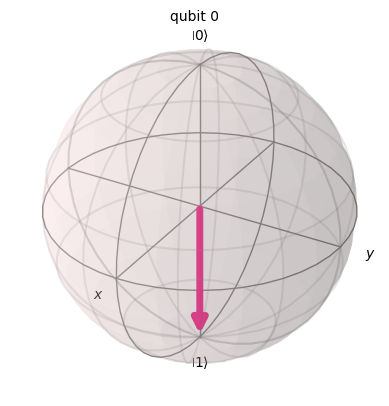

In [23]:
#initiation
estimator = Aer.get_backend('statevector_simulator')

#run
job = estimator.run(qc_x)

# get the eigenvector after passing through X gate
result= job.result().get_statevector(qc_x, decimals=3)


# Printing the state after passing through X gate
print("\nQuantum state is:",result)

# Plotting the Bloch Sphere
plot_bloch_multivector(result)

#### As expected, the applying $X$ gate on $\ket 0$ flips it into $\ket 1$: $X\ket 0 = \ket 1$.

#### The following code is another usage of Aer module to represent the matrix form of the gate(s) used in the quantum circuit.  

In [24]:
#initiation
estimator = Aer.get_backend('unitary_simulator')

#run
job = estimator.run(qc_x)

# get the unitary operator of X gate
job.result().get_unitary(qc_x, decimals=3)

Operator([[0.+0.j, 1.+0.j],
          [1.+0.j, 0.+0.j]],
         input_dims=(2,), output_dims=(2,))


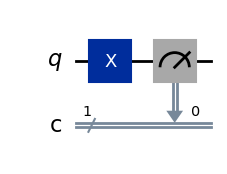

In [4]:
# Another way of presenting a quantum circuit with a X gate
qc_x = QuantumCircuit(1,1) # the first 1 is the number of qubits and the second 1 is the number of classical bits
qc_x.x(0)
qc_x.measure(0,0) # measure the state of the qubit using a classical bit.
qc_x.draw('mpl')

#### To prove one more time that the the result of the measurement is 1, we use the another simulator of Aer: **qasm_simulator** where shows the outcome of $n$ times measurement. 

Total counts are: {'1': 1000}


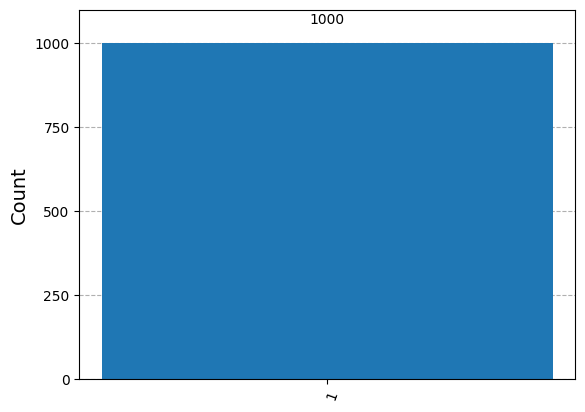

In [32]:
estimator = Aer.get_backend('qasm_simulator')

job = estimator.run(qc_x , shots = 1000) # shots is the number of measurements

result = job.result()

counts = result.get_counts(qc_x)
print("Total counts are:", counts)

plot_histogram(counts)

### Measurement on 2 qubits using 2 classical bits

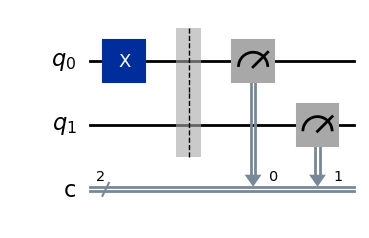

In [5]:
qc_x = QuantumCircuit(2,2, name = 'qc') # the first 2 is the number of qubits and the second 2 is the number of classical bits
qc_x.x(0) # flip the state of the 1st qubit from |0> to |1>
qc_x.barrier()
qc_x.measure([0,1],[0,1])
#qc_x.measure_all() # measurs all qubits at once; when we don't define classical bits: QuantumCircuit(2, name = 'qc')
qc_x.draw('mpl')

## 2. $Y$ Pauli Gate
#### $Y$ gate, like the $X$ gate, flips the qubit, but it also multiplies the state by the imaginary unit $i$.

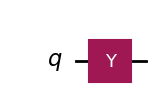

In [3]:
qc_y = QuantumCircuit(1)
qc_y.y(0)
qc_y.draw('mpl')


Quantum state is: Statevector([0.-0.j, 0.+1.j],
            dims=(2,))


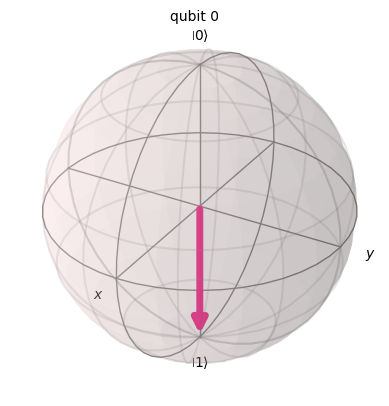

In [4]:
#initiation
estimator = Aer.get_backend('statevector_simulator')

#run
job = estimator.run(qc_y)

# get the eigenvector after passing through X gate
result= job.result().get_statevector(qc_y, decimals=3)


# Printing the state after X gate
print("\nQuantum state is:",result)

# Plotting the Bloch Sphere
plot_bloch_multivector(result)

#### As is shown in the Bloch sphere and printed, the $Y$ gate flips the vaccume initial state: $Y \ket 0 = i \ket 1$.

#### Using unitary_simulator of Aer, we can confirm that the unitary matrix of the gate used in the quantum circuit is $Y$ gate:  

In [5]:
#initiation
estimator = Aer.get_backend('unitary_simulator')

#run
job = estimator.run(qc_y)

# get the unitary operator of Y| gate
job.result().get_unitary(qc_y, decimals=3)

Operator([[0.-0.j, 0.-1.j],
          [0.+1.j, 0.+0.j]],
         input_dims=(2,), output_dims=(2,))


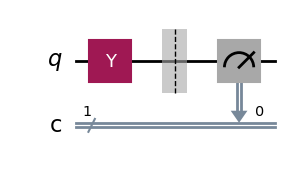

In [6]:
qc_y = QuantumCircuit(1,1) 
qc_y.y(0)
qc_y.barrier()
qc_y.measure(0,0)
qc_y.draw('mpl')

## 3. $Z$ Pauli Gate
#### $Z$ gate, known as phase-flip gate, might change the phase of state. It leaves the $\ket 0$ state unchanged but flips the sign (introduces a phase of $\pi$ ) on the $\ket 1$ state.

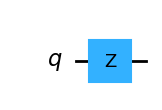

In [7]:
qc_z = QuantumCircuit(1)
qc_z.z(0)
qc_z.draw('mpl')


Quantum state is: Statevector([ 1.+0.j, -0.+0.j],
            dims=(2,))


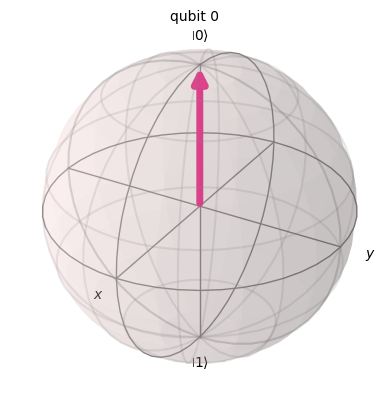

In [8]:
#initiation
estimator = Aer.get_backend('statevector_simulator')

#run
job = estimator.run(qc_z)

# get the eigenvector after passing through X gate
result= job.result().get_statevector(qc_z, decimals=3)


# Printing the state after X gate
print("\nQuantum state is:",result)

# Plotting the Bloch Sphere
plot_bloch_multivector(result)

#### The default of given qubit, as mentioned, is to be $\ket 0$ state, where after passing $Z$ gate it will stay in the same state $\ket 0$ as seen in the Bloch sphere above. In another words, the phase of the state is zero.

In [9]:
#initiation
estimator = Aer.get_backend('unitary_simulator')

#run
job = estimator.run(qc_z)

# get the unitary operator of Z gate
job.result().get_unitary(qc_z, decimals=3)

Operator([[ 1.+0.j,  0.+0.j],
          [-0.+0.j, -1.+0.j]],
         input_dims=(2,), output_dims=(2,))


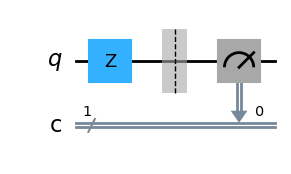

In [10]:
qc_z = QuantumCircuit(1,1) 
qc_z.z(0)
qc_z.barrier()
qc_z.measure(0,0)
qc_z.draw('mpl')

## 4.1. $S$ Gate

#### $S$ gate, known as $\pi/2$ phase shift gate, causes a phase shift of $\pi/2$ to the $\ket 1$ while leaving the $\ket 0$ state unchanged.
#### In order to see the effect of $S$ gate, first we apply X gate to flip the default state $\ket 0$ into $\ket 1$. 

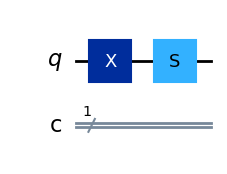

In [12]:
qc_s = QuantumCircuit(1,1, name= 'qc')
qc_s.x(0)
qc_s.s(0)
qc_s.draw('mpl')

#### Then using the following code, it is confirmed that the $S$ gate turns $\ket 1$ to $i\ket 1$: $S\ket 1 = e^{i\pi/2}\ket 1 = i\ket 1$.


Quantum state is: Statevector([ 0.+0.j, -0.+1.j],
            dims=(2,))


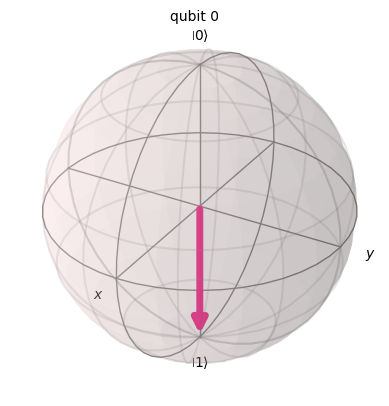

In [13]:
#initiation
estimator = Aer.get_backend('statevector_simulator')

#run
job = estimator.run(qc_s)

# get the eigenvector after passing through X gate
result= job.result().get_statevector(qc_s, decimals=3)


# Printing the state after X gate
print("\nQuantum state is:",result)

# Plotting the Bloch Sphere
plot_bloch_multivector(result)

In [14]:
#initiate
estimator = Aer.get_backend('unitary_simulator')

#run
job = estimator.run(qc_s)

# get the unitary operator of S gate
job.result().get_unitary(qc_s, decimals=3)

Operator([[ 0.+0.j,  1.+0.j],
          [-0.+1.j, -0.+0.j]],
         input_dims=(2,), output_dims=(2,))


#### This unitary matrix is the result for matrix product $SX$ applied to initial state $\ket 0$.

## 4.2. $S^{\dagger}$ Gate

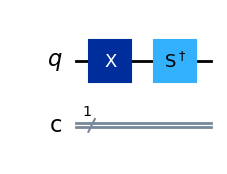

In [15]:
qc_sdg = QuantumCircuit(1,1, name='qc')
qc_sdg.x(0)
qc_sdg.sdg(0)
qc_sdg.draw('mpl')

#### The following result shows the $S^{\dagger} \ket 1 = e^{-i\pi/2}\ket 1 = -i \ket 1$.


Quantum state is: Statevector([0.+0.j, 0.-1.j],
            dims=(2,))


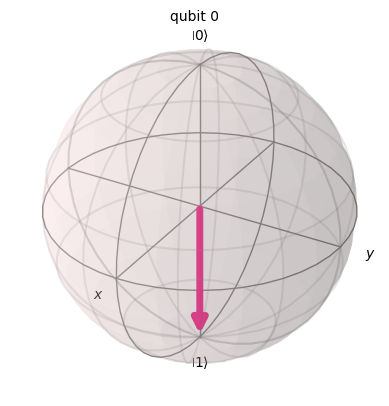

In [16]:
#initiation
estimator = Aer.get_backend('statevector_simulator')

#run
job = estimator.run(qc_sdg)

# get the eigenvector after passing through X gate
result= job.result().get_statevector(qc_sdg, decimals=3)


# Printing the state after X gate
print("\nQuantum state is:",result)

# Plotting the Bloch Sphere
plot_bloch_multivector(result)

In [17]:
# initiation
estimator = Aer.get_backend('unitary_simulator')

#run
job = estimator.run(qc_sdg)

# get the unitary operator of S gate
job.result().get_unitary(qc_sdg, decimals=3)

Operator([[0.+0.j, 1.+0.j],
          [0.-1.j, 0.-0.j]],
         input_dims=(2,), output_dims=(2,))


#### This unitary matrix is the matrix product of $S^{\dagger}X$.

## 5.1. $T$ Gate
#### The T gate, known also as $\pi/4$ phase gate, introduces a phase shift of $\pi/4$ to the $\ket 1$ state while leaving the $\ket 0$ state unchanged.
#### Again, to change the initial state from the default $\ket 0$ state to $\ket 1$, first the $X$ gate is applied.

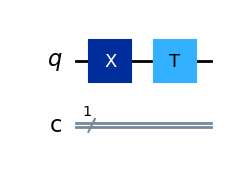

In [18]:
qc_t = QuantumCircuit(1,1,name = 'qc')
qc_t.x(0)
qc_t.t(0)
qc_t.draw('mpl')


Quantum state is: Statevector([0.   +0.j   , 0.707+0.707j],
            dims=(2,))


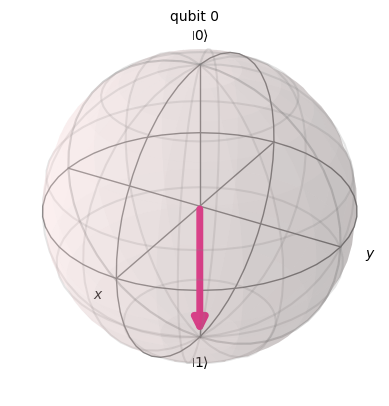

In [20]:
#initiation
estimator = Aer.get_backend('statevector_simulator')

#run
job = estimator.run(qc_t)

# get the eigenvector after passing through X gate
result= job.result().get_statevector(qc_t, decimals=3)


# Printing the state after T gate
print("\nQuantum state is:",result)

# Plotting the Bloch Sphere
plot_bloch_multivector(result)

#### The printed Statevector confirms that $T$ gate changes the phase of state $\ket 1$: $T\ket 1  = \big(\cos{(\pi/4)} + i \sin{(\pi/4)}\big)\ket 1$.

In [19]:
# initiation
estimator = Aer.get_backend('unitary_simulator')

#run
job = estimator.run(qc_t)

# get the unitary operator of S gate
job.result().get_unitary(qc_t, decimals=3)

Operator([[0.   +0.j   , 1.   +0.j   ],
          [0.707+0.707j, 0.   +0.j   ]],
         input_dims=(2,), output_dims=(2,))


#### The printed unitary matrix is the product of $TX$ in the quantum circuit applied to the qubit.

## 5.2. $T^{\dagger}$ Gate

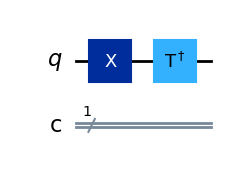

In [21]:
qc_tdg = QuantumCircuit(1,1, name='qc')
qc_tdg.x(0)
qc_tdg.tdg(0)
qc_tdg.draw('mpl')

#### The following result shows the $T^{\dagger} |1> = e^{-i\pi/4}|1> = \cos{(\pi/4)}-i\sin{(\pi/4)} |1>$.


Quantum state is: Statevector([0.   +0.j   , 0.707-0.707j],
            dims=(2,))


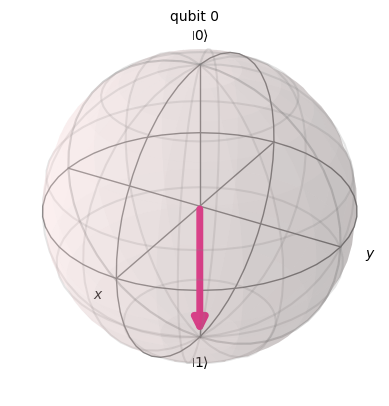

In [22]:
#initiation
estimator = Aer.get_backend('statevector_simulator')

#run
job = estimator.run(qc_tdg)

# get the eigenvector after passing through X gate
result= job.result().get_statevector(qc_tdg, decimals=3)


# Printing the state after T gate
print("\nQuantum state is:",result)

# Plotting the Bloch Sphere
plot_bloch_multivector(result)

In [23]:
# initiation
estimator = Aer.get_backend('unitary_simulator')

#run
job = estimator.run(qc_tdg)

# get the unitary operator of S gate
job.result().get_unitary(qc_tdg, decimals=3)

Operator([[0.   +0.j   , 1.   +0.j   ],
          [0.707-0.707j, 0.   +0.j   ]],
         input_dims=(2,), output_dims=(2,))


#### As expected the printed unitary matrix is the product of $T^{\dagger}X$

## 6.1. $R_x$ Gate

#### The $R_i$ gate with $i = x, y, z$ performs a rotation around the $i$-axis of the Bloch sphere by a specified angle $\theta$.

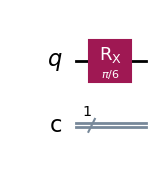

In [9]:
qc_rx = QuantumCircuit(1,1, name='qc')
theta_x = pi/6
qc_rx.rx(theta_x , 0)
qc_rx.draw('mpl')


Quantum state is: Statevector([0.966+0.j   , 0.   -0.259j],
            dims=(2,))


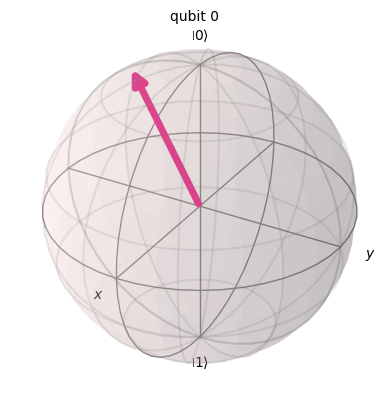

In [10]:
#initiation
estimator = Aer.get_backend('statevector_simulator')

#run
job = estimator.run(qc_rx)

# get the eigenvector after passing through X gate
result= job.result().get_statevector(qc_rx, decimals=3)


# Printing the state after T gate
print("\nQuantum state is:",result)

# Plotting the Bloch Sphere
plot_bloch_multivector(result)

#### As is seen, the $R_x$ gate places in general the initial state $|0>$ into a superposition state: $\cos{(\pi/6)} |0> -i \sin{(\pi/6)}|1>$.
#### By changing $\theta$ in the interval $[0,2\pi]$, the the statevector of the qubit will change in a plane prependicular on $x$ axis.

In [42]:
# initiation
estimator = Aer.get_backend('unitary_simulator')

#run
job = estimator.run(qc_rx)

# get the unitary operator of S gate
job.result().get_unitary(qc_rx, decimals=3)

Operator([[0.966+0.j   , 0.   -0.259j],
          [0.   -0.259j, 0.966+0.j   ]],
         input_dims=(2,), output_dims=(2,))


#### This is the matrix form of the $R_x$ for $\theta = \pi/6$ where
$$
R_x(\theta) = \begin{pmatrix}
\cos\left(\frac{\theta}{2}\right) & -i\sin\left(\frac{\theta}{2}\right) \\
-i\sin\left(\frac{\theta}{2}\right) & \cos\left(\frac{\theta}{2}\right)
\end{pmatrix}.
$$


## 6.2. $R_y$ Gate

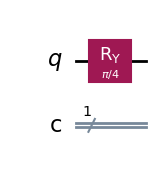

In [31]:
qc_ry= QuantumCircuit(1,1, name='qc')
theta_y = pi/4
qc_ry.ry(theta_y, 0)
qc_ry.draw('mpl')


Quantum state is: Statevector([0.924+0.j, 0.383+0.j],
            dims=(2,))


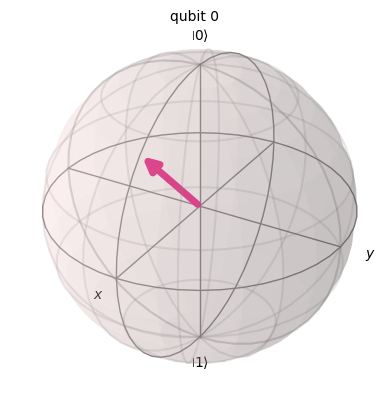

In [38]:
#initiation
estimator = Aer.get_backend('statevector_simulator')

#run
job = estimator.run(qc_ry)

# get the eigenvector after passing through X gate
result= job.result().get_statevector(qc_ry, decimals=3)


# Printing the state after T gate
print("\nQuantum state is:",result)

# Plotting the Bloch Sphere
plot_bloch_multivector(result)

#### likewise the $R_x$, $R_y$ gate also maps the initial state $|0>$ into a superposition state: $\cos{(\pi/4)} |0> - \sin{(\pi/4)}|1>$.
#### Likewise $R_x$, $R_y$ affects the initial state so that by changing the $\theta \in [0,2\pi]$ the statevector stays on a plane which is prependicular into the $y$ axis.

In [43]:
# initiation
estimator = Aer.get_backend('unitary_simulator')

#run
job = estimator.run(qc_ry)

# get the unitary operator of S gate
job.result().get_unitary(qc_ry, decimals=3)

Operator([[ 0.924+0.j, -0.383+0.j],
          [ 0.383+0.j,  0.924+0.j]],
         input_dims=(2,), output_dims=(2,))


#### This is a matrix form of $R_Y$ for $\theta =\pi/4$ where general form of $R_y$ is
$$
R_y(\theta) = \begin{pmatrix}
\cos\left(\frac{\theta}{2}\right) & -\sin\left(\frac{\theta}{2}\right) \\
\sin\left(\frac{\theta}{2}\right) & \cos\left(\frac{\theta}{2}\right)
\end{pmatrix}.
$$
 

## 6.3. $R_z$ Gate

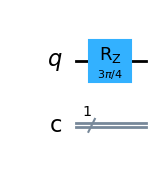

In [13]:
qc_rz = QuantumCircuit(1,1, name='qc')
theta_z = 3*pi/4
qc_rz.rz(theta_z, 0)
qc_rz.draw('mpl')


Quantum state is: Statevector([0.383-0.924j, 0.   +0.j   ],
            dims=(2,))


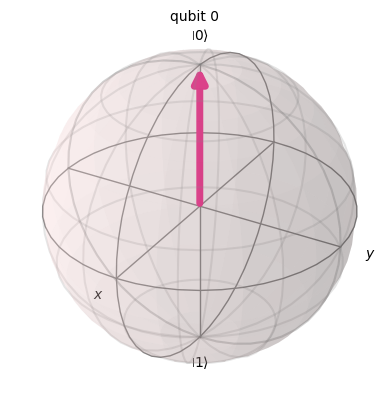

In [12]:
#initiation
estimator = Aer.get_backend('statevector_simulator')

#run
job = estimator.run(qc_rz)

# get the eigenvector after passing through X gate
result= job.result().get_statevector(qc_rz, decimals=3)


# Printing the state after T gate
print("\nQuantum state is:",result)

# Plotting the Bloch Sphere
plot_bloch_multivector(result)

#### Despite $R_x$ and $R_y$, $R_z$ does not produce a superposition from the initial state, but instead it add a phase shift to the qubit state: $R_z |0> = e^{-i3\pi/8}|0>$.

In [14]:
# initiation
estimator = Aer.get_backend('unitary_simulator')

#run
job = estimator.run(qc_rz)

# get the unitary operator of S gate
job.result().get_unitary(qc_rz, decimals=3)

Operator([[0.383-0.924j, 0.   +0.j   ],
          [0.   +0.j   , 0.383+0.924j]],
         input_dims=(2,), output_dims=(2,))


#### This a matrix form of $R_z$ for $\theta = 3\pi/4$ where $R_z$ is a diagonal matrix as 
$$
R_z(\theta) = \begin{pmatrix}
e^{-i\frac{\theta}{2}} & 0 \\
0 & e^{i\frac{\theta}{2}}
\end{pmatrix}.
$$
